<a href="https://colab.research.google.com/github/vitorbaptista/emprestimos_biblioteca_ufrn/blob/master/analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install datapackage

In [11]:
import datapackage

pkg = datapackage.Package('https://raw.githubusercontent.com/vitorbaptista/emprestimos_biblioteca_ufrn/master/datapackage.json')
pkg.resource_names

['2019_1', '2018_2']

In [12]:
pkg.get_resource('2019_1').read(keyed=True)[0:1]

[{'codigo_barras': 'L169931',
  'data_devolucao': datetime.date(2019, 1, 25),
  'data_emprestimo': datetime.date(2019, 1, 2),
  'data_renovacao': None,
  'id_emprestimo': 2782809,
  'matricula_ou_siape': 20191005377,
  'nome_usuario': 'RAIMUNDO VICENTE PEREIRA NETO',
  'tipo_vinculo_usuario': 'ALUNO DE PÓS-GRADUAÇÃO'}]

In [13]:
import pandas as pd

df = pd.DataFrame(pkg.get_resource('2019_1').read(keyed=True))
df.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,nome_usuario,tipo_vinculo_usuario
0,2782809,L169931,None,2019-01-02,2019-01-25,2.019101e+10,RAIMUNDO VICENTE PEREIRA NETO,ALUNO DE PÓS-GRADUAÇÃO
1,2782810,L099542,None,2019-01-02,2019-01-03,2.019101e+10,RAIMUNDO VICENTE PEREIRA NETO,ALUNO DE PÓS-GRADUAÇÃO
2,2782811,L199924,None,2019-01-02,2019-01-25,2.019101e+10,RAIMUNDO VICENTE PEREIRA NETO,ALUNO DE PÓS-GRADUAÇÃO
3,2782812,2010081229,2019-01-17,2019-01-02,2019-01-28,2.018014e+10,DAVID DANIEL LIMA DE SOUZA,ALUNO DE GRADUAÇÃO
4,2782813,2018022572,2019-01-17,2019-01-02,2019-01-28,2.018014e+10,DAVID DANIEL LIMA DE SOUZA,ALUNO DE GRADUAÇÃO


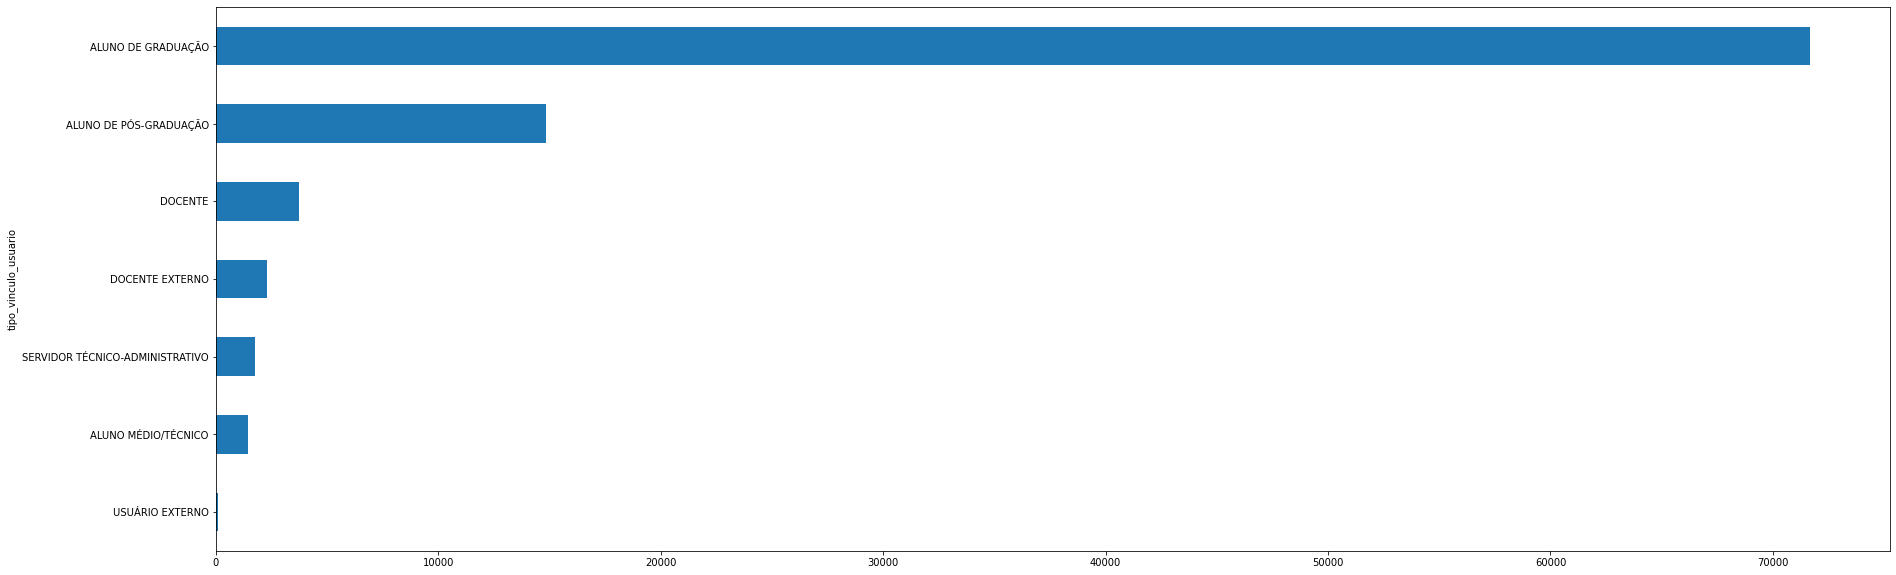

In [14]:
df.groupby('tipo_vinculo_usuario').id_emprestimo.nunique().sort_values(ascending=True).plot(kind='barh', figsize=(30, 10));

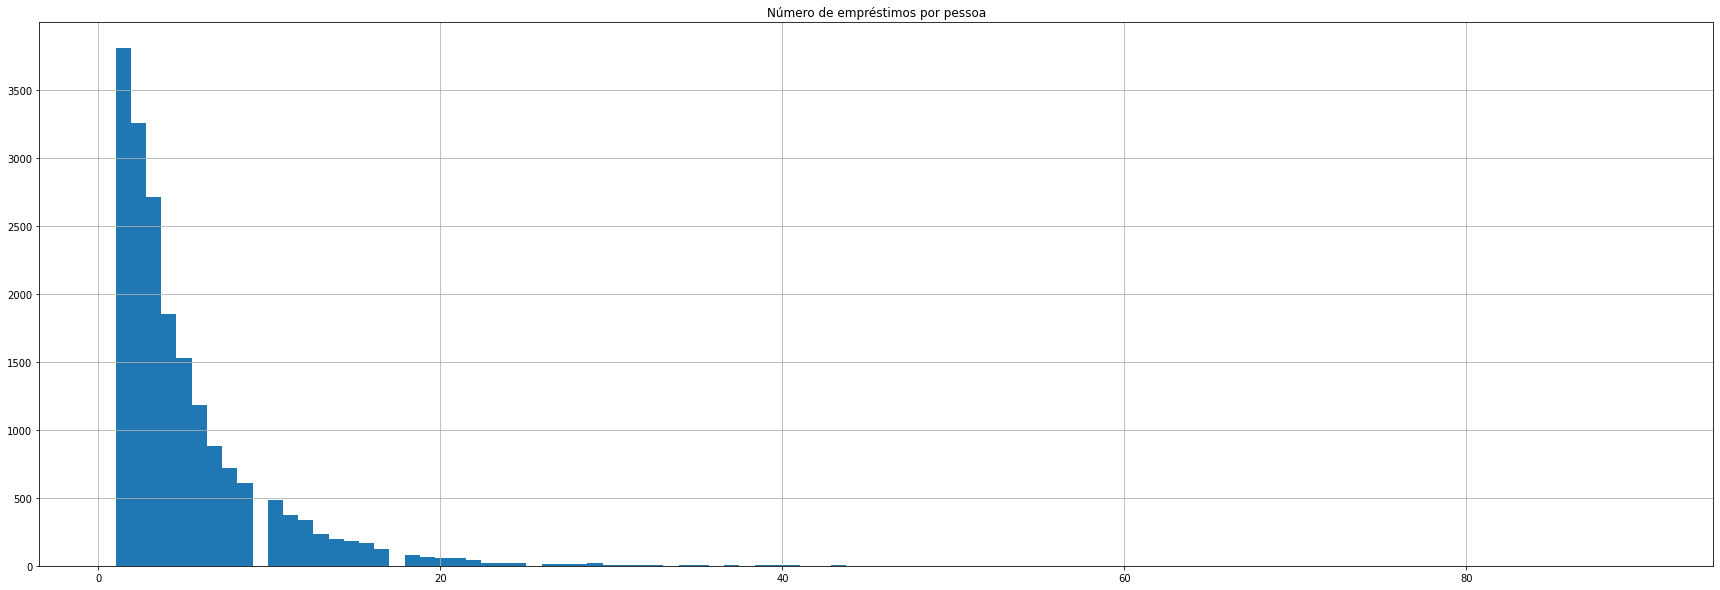

In [15]:
ax = df.groupby('matricula_ou_siape').id_emprestimo.nunique().hist(figsize=(30, 10), bins=100)
ax.set_title('Número de empréstimos por pessoa');

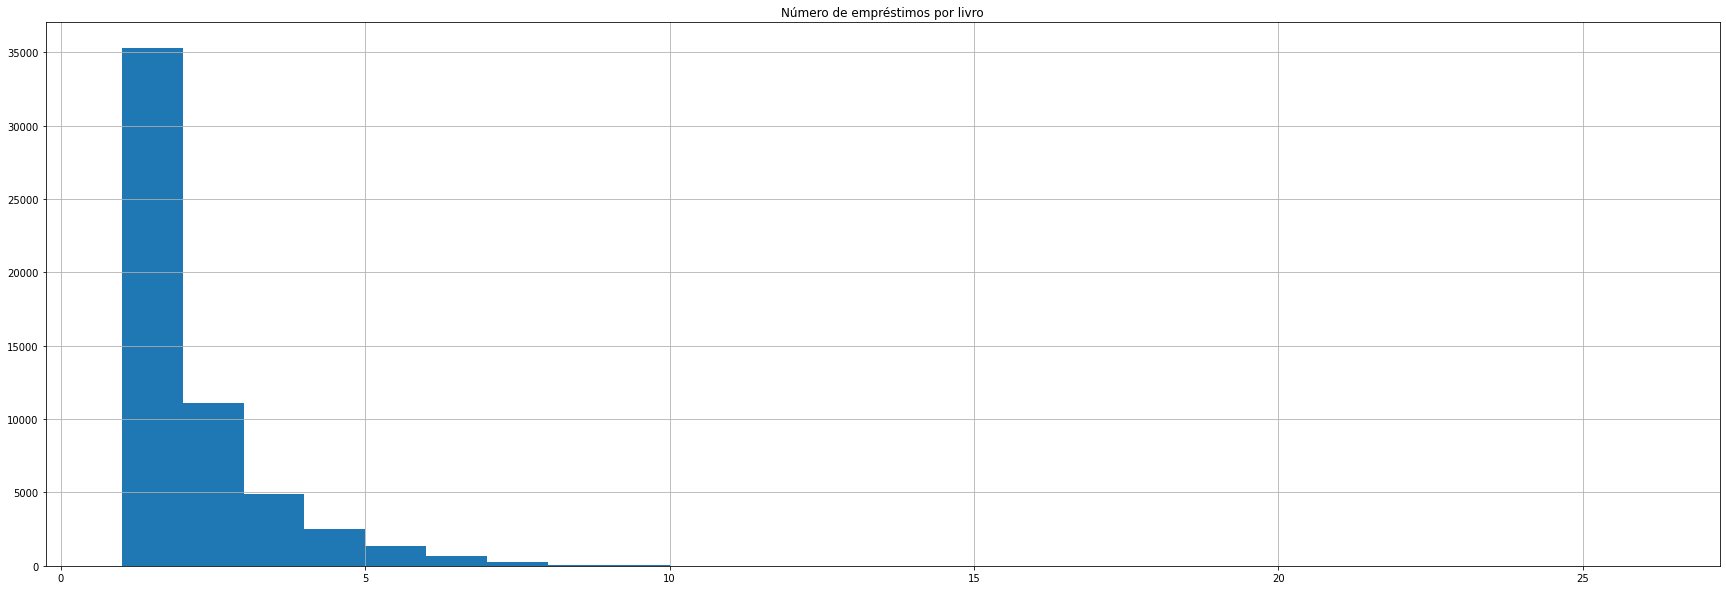

In [16]:
ax = df.groupby('codigo_barras').id_emprestimo.nunique().hist(figsize=(30, 10), bins=25)
ax.set_title('Número de empréstimos por livro');